toy_notebook_en 
March 28, 2019

## 1 On the computation of π

### 1.1 Asking the maths library

My computer tells me that π is approximately

In [7]:
from math import *
print(pi)

3.141592653589793


### 1.2 Buffon’s needle

Applying the method of Buffon’s needle, we get the approximation


In [8]:
import numpy as np

np.random.seed(seed=42)
N = 10000
x = np.random.uniform(low=0, high=1, size=N)
theta = np.random.uniform(low=0, high=pi/2, size=N)

approx_pi_buffon = 2 / (np.sum((x + np.sin(theta)) > 1) / N)
print(approx_pi_buffon)


3.128911138923655


### 1.3 Using a surface fraction argument

A method that is easier to understand and does not make use of the sin function is based on the
fact that if X ∼ U(0, 1) and Y ∼ U(0, 1), then P[X² + Y² ≤ 1] = π/4 (see "Monte Carlo method" on Wikipedia).  
The following code uses this approach:


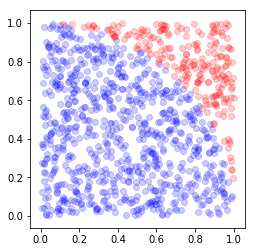

In [9]:
 %matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(seed=42)
N = 1000
x = np.random.uniform(size=N, low=0, high=1)
y = np.random.uniform(size=N, low=0, high=1)
1
accept = (x*x+y*y) <= 1
reject = np.logical_not(accept)
fig, ax = plt.subplots(1)
ax.scatter(x[accept], y[accept], c='b', alpha=0.2, edgecolor=None)
ax.scatter(x[reject], y[reject], c='r', alpha=0.2, edgecolor=None)
ax.set_aspect('equal')


It is then straightforward to obtain a (not really good) approximation to π by counting how many times, on average, X² + Y² is smaller than 1:

In [10]:
4*np.mean(accept)

3.112